In [127]:
from pandas import DataFrame, read_csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Location = r'TrainingData.csv'
df = pd.read_csv(Location)
df.head()

rowID  chunkID  position_within_chunk  month_most_common   weekday  hour  \
0      1        1                      1                 10  Saturday    21   
1      2        1                      2                 10  Saturday    22   
2      3        1                      3                 10  Saturday    23   
3      4        1                      4                 10    Sunday     0   
4      5        1                      5                 10    Sunday     1   

   Solar.radiation_64  WindDirection..Resultant_1  \
0                0.01                       117.0   
1                0.01                       231.0   
2                0.01                       247.0   
3                0.01                       219.0   
4                0.01                         2.0   

   WindDirection..Resultant_1018  WindSpeed..Resultant_1      ...        \
0                          187.0                     0.3      ...         
1                          202.0                     0.5      ...         
2                          227.0                     0.5      ...         
3                          218.0                     0.2      ...         
4                          216.0                     0.2      ...         

   target_4_6006  target_4_8003  target_5_6006  target_7_57  target_8_57  \
0       1.748424            NaN            NaN     5.130631     1.341606   
1       2.144120            NaN            NaN     5.130631     1.195779   
2       1.932469            NaN            NaN     5.136395     1.409658   
3       2.088907            NaN            NaN     5.217102     1.477711   
4       2.604232            NaN            NaN     5.217102     1.458267   

   target_8_4002  target_8_6004  target_8_8003  target_9_4002  target_9_8003  
0       2.138792       3.013752            NaN       5.679280            NaN  
1       2.722099       3.888712            NaN       7.426751            NaN  
2       3.110970       3.888712            NaN       7.683732            NaN  
3       2.041574       3.208188            NaN       4.831243            NaN  
4       2.138792       3.499841            NaN       4.625658            NaN  

[5 rows x 95 columns]

In [5]:
len(df.chunkID.unique()) #there are 208 unique chunks of data

208

In [17]:
df2=df.groupby(['chunkID','position_within_chunk']).mean() #each chunks has 192 rows corresponding to 8 days of data
df2

rowID  month_most_common  hour  \
chunkID position_within_chunk                                   
1       1                          1                 10    21   
        2                          2                 10    22   
        3                          3                 10    23   
        4                          4                 10     0   
        5                          5                 10     1   
        6                          6                 10     2   
        7                          7                 10     3   
        8                          8                 10     4   
        9                          9                 10     5   
        10                        10                 10     6   
        11                        11                 10     7   
        12                        12                 10     8   
        13                        13                 10     9   
        14                        14                 10    10   
        15                        15                 10    11   
        16                        16                 10    12   
        17                        17                 10    13   
        18                        18                 10    14   
        19                        19                 10    15   
        20                        20                 10    16   
        21                        21                 10    17   
        22                        22                 10    18   
        23                        23                 10    19   
        24                        24                 10    20   
        25                        25                 10    21   
        26                        26                 10    22   
        27                        27                 10    23   
        28                        28                 10     0   
        29                        29                 10     1   
        30                        30                 10     2   
...                              ...                ...   ...   
210     163                    55339                  8     3   
        164                    55340                  8     4   
        165                    55341                  8     5   
        166                    55342                  8     6   
        167                    55343                  8     7   
        168                    55344                  8     8   
        169                    55345                  8     9   
        170                    55346                  8    10   
        171                    55347                  8    11   
        172                    55348                  8    12   
        173                    55349                  8    13   
        174                    55350                  8    14   
        175                    55351                  8    15   
        176                    55352                  8    16   
        177                    55353                  8    17   
        178                    55354                  8    18   
        179                    55355                  8    19   
        180                    55356                  8    20   
        181                    55357                  8    21   
        182                    55358                  8    22   
        183                    55359                  8    23   
        184                    55360                  8     0   
        185                    55361                  8     1   
        186                    55362                  8     2   
        187                    55363                  8     3   
        188                    55364                  8     4   
        189                    55365                  8     5   
        190                    55366                  8     6   
        191                    55367                  8     7   
 

In [ ]:
#just to see what the data looks like to graph each chunk

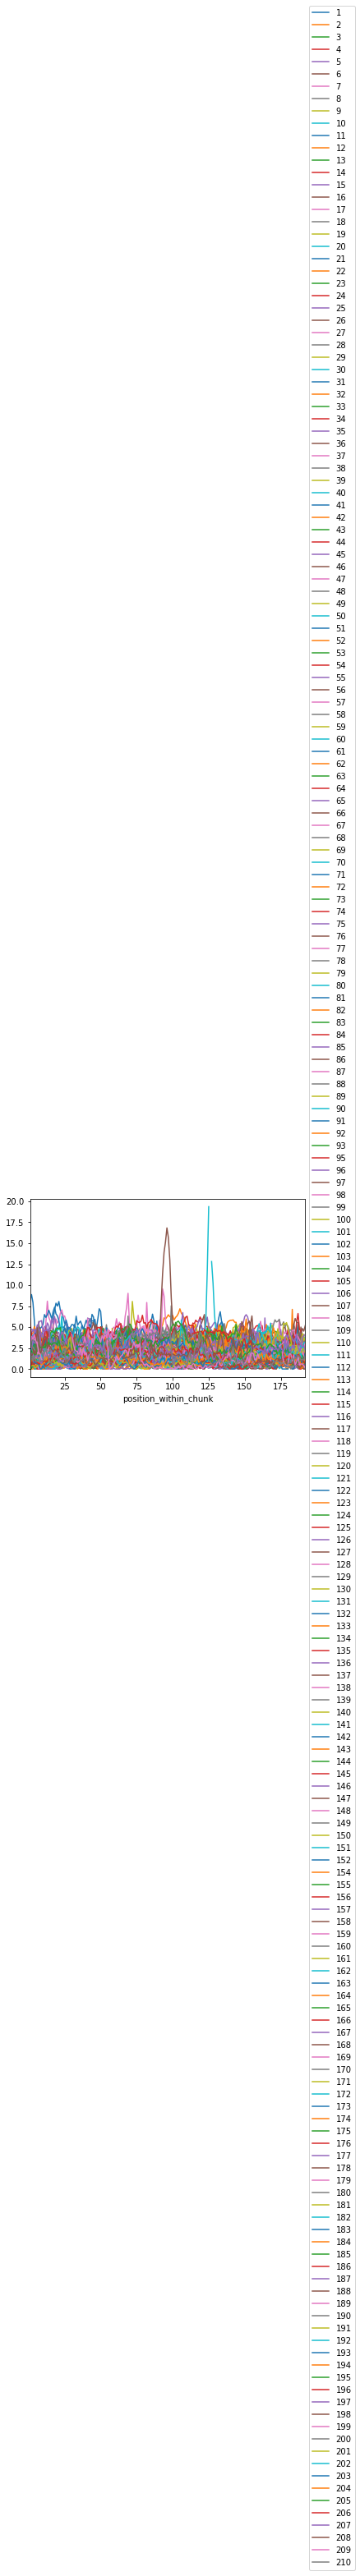

In [38]:

plot_df2 = df2.unstack('chunkID').loc[:, 'target_4_6006']

##plot_df.index = pd.PeriodIndex(plot_df.index.tolist(), freq='A')
plot_df2.plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

/Users/jtlam/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


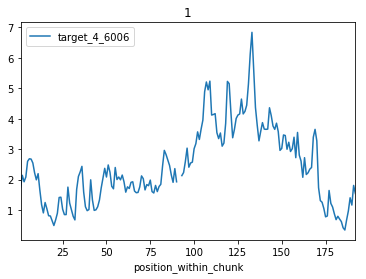

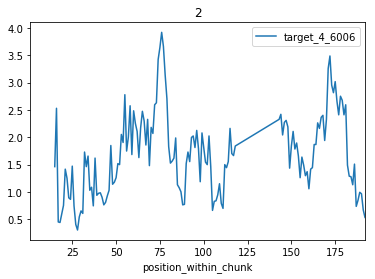

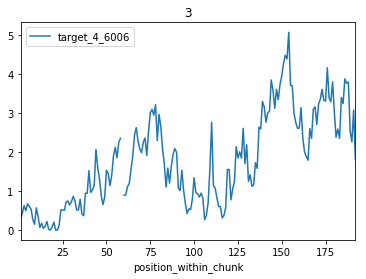

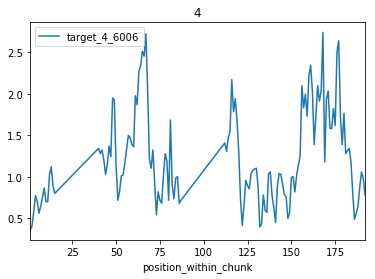

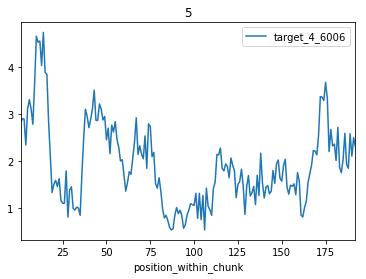

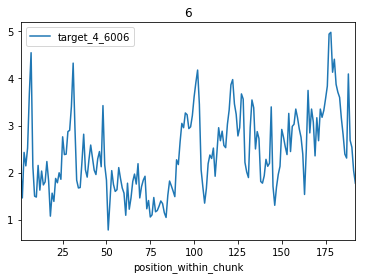

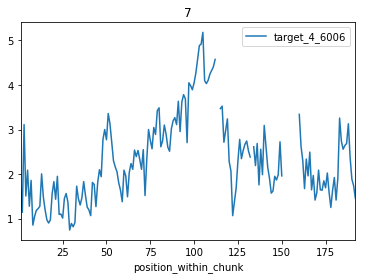

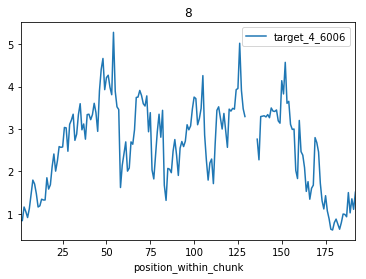

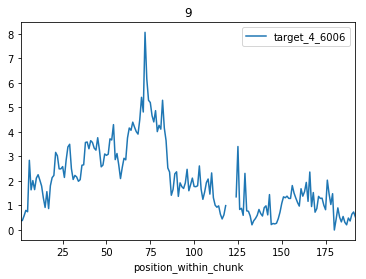

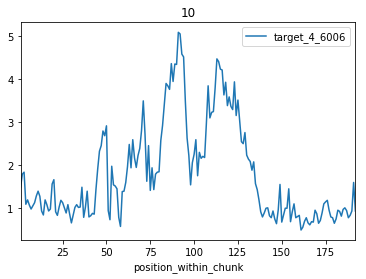

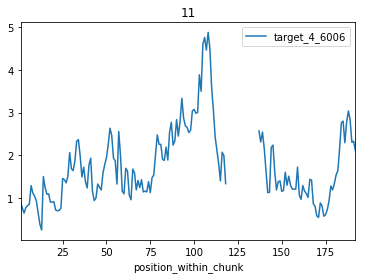

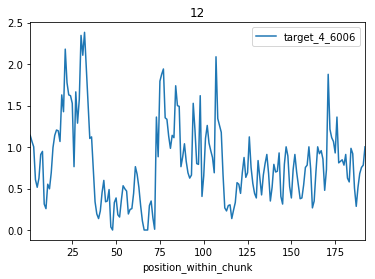

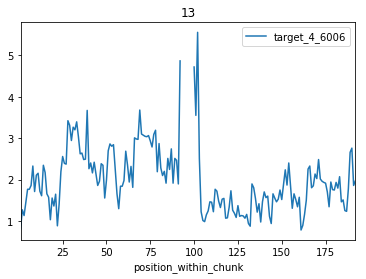

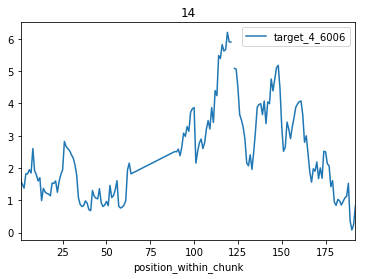

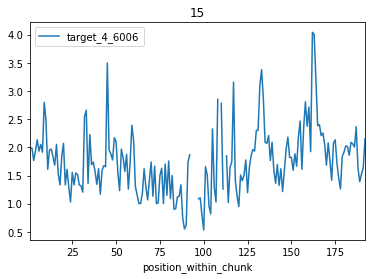

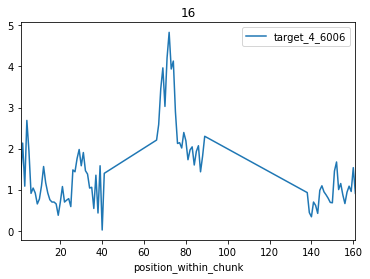

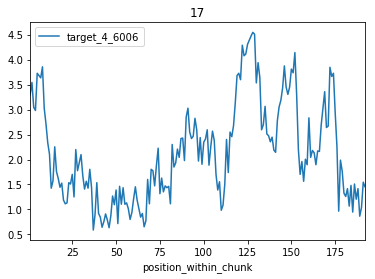

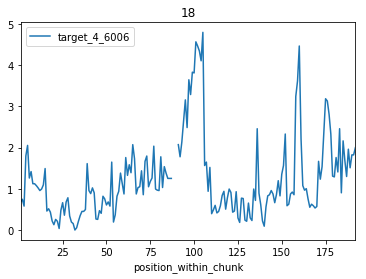

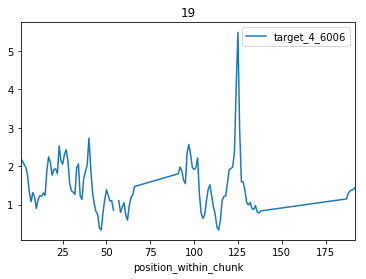

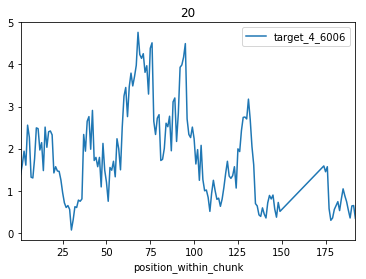

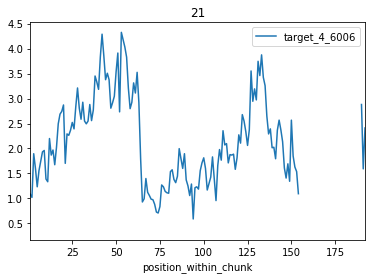

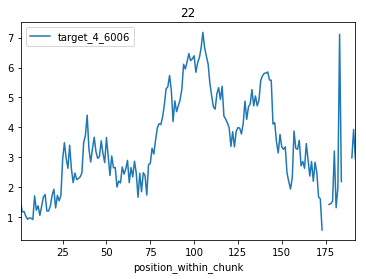

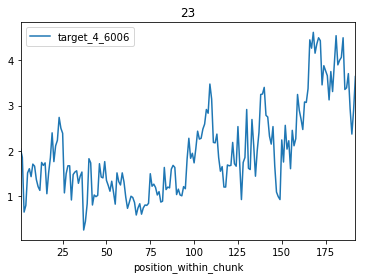

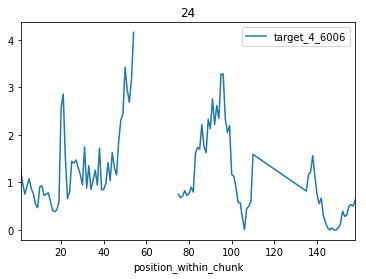

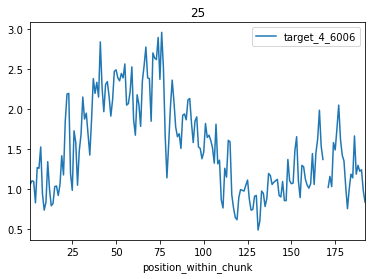

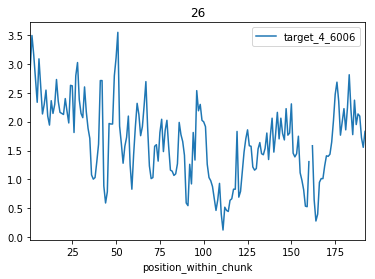

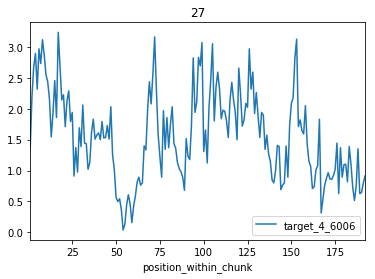

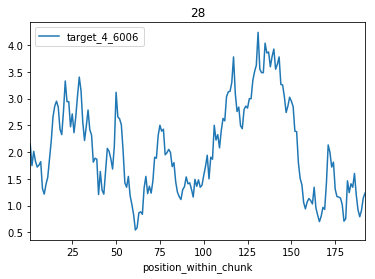

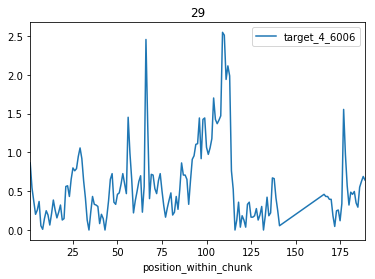

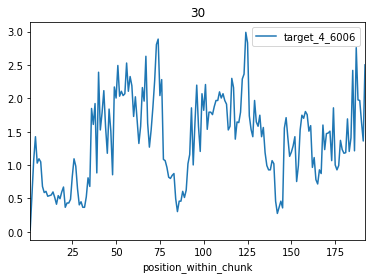

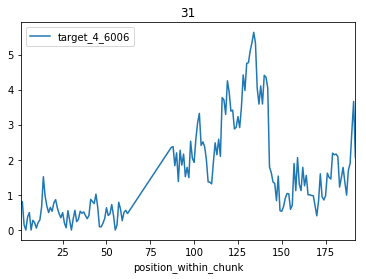

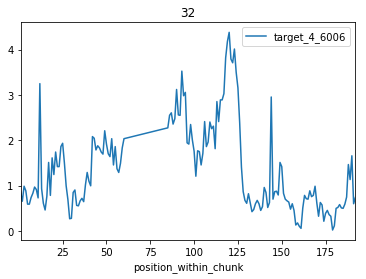

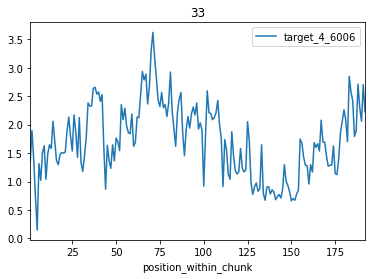

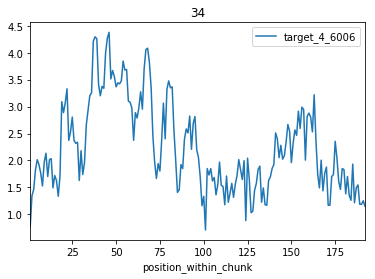

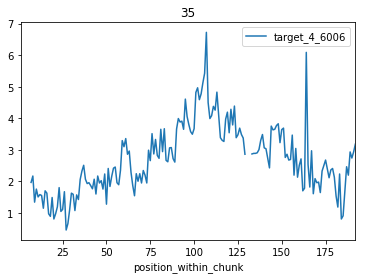

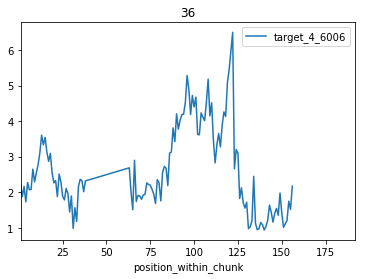

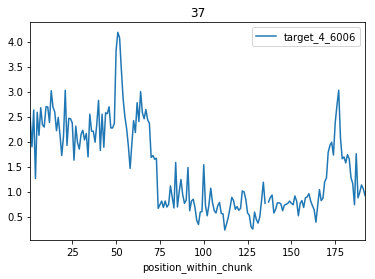

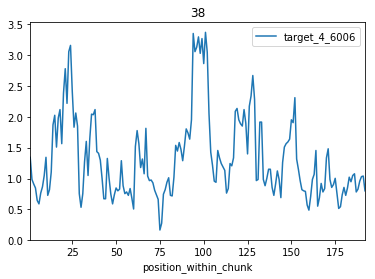

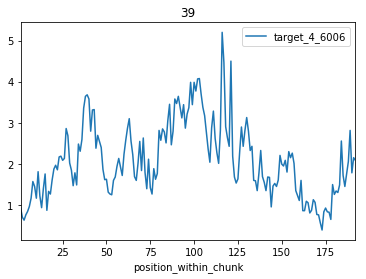

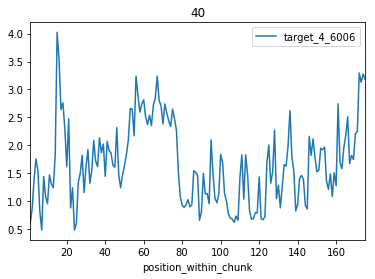

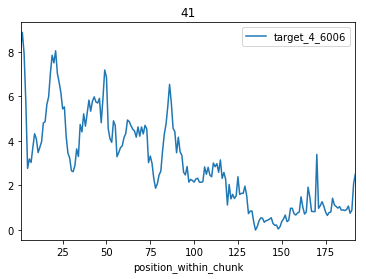

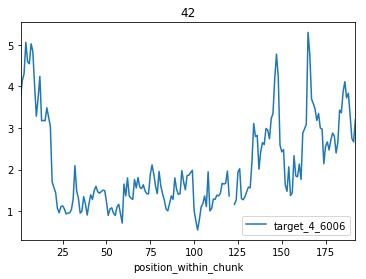

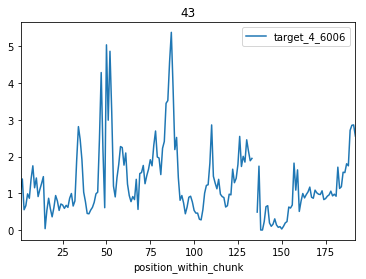

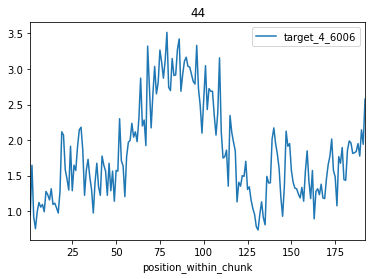

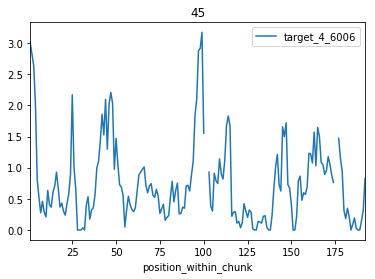

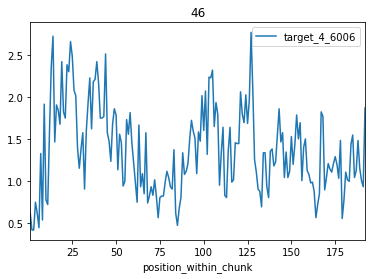

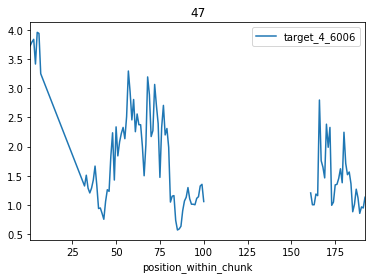

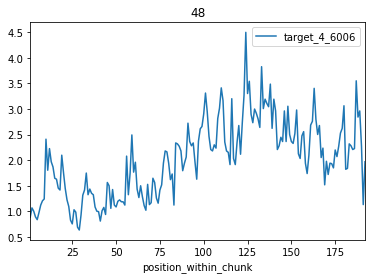

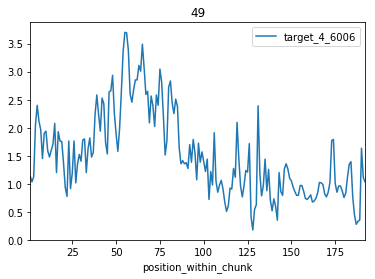

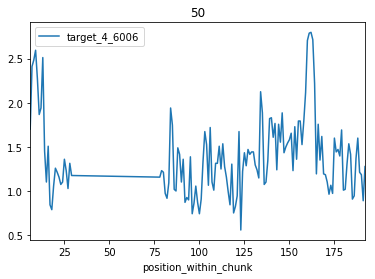

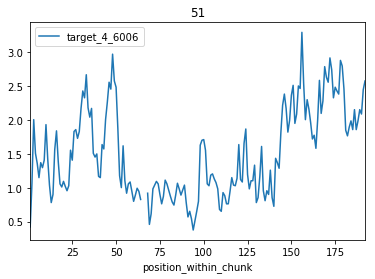

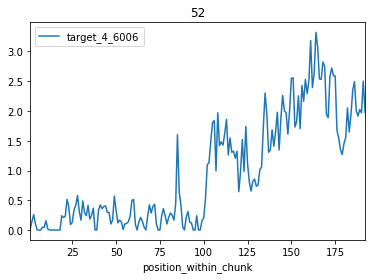

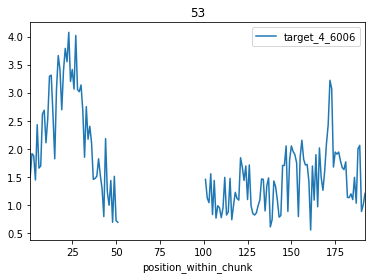

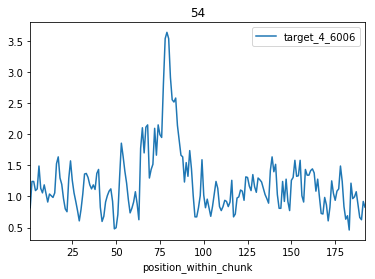

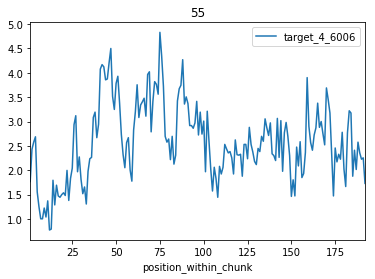

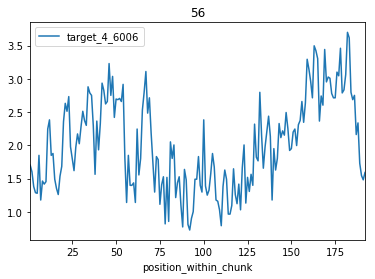

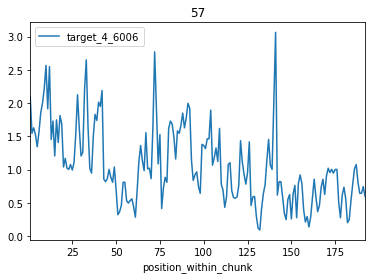

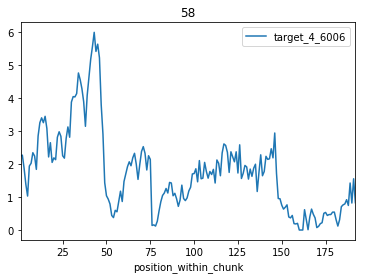

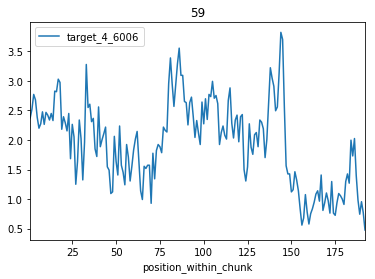

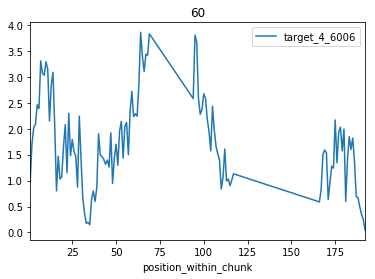

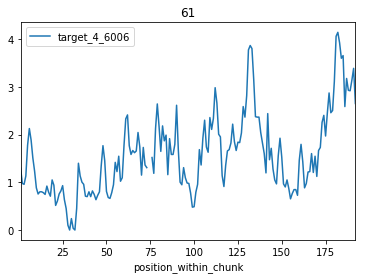

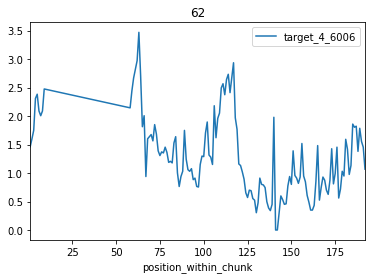

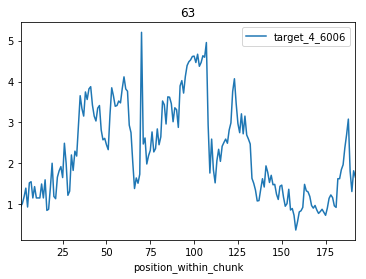

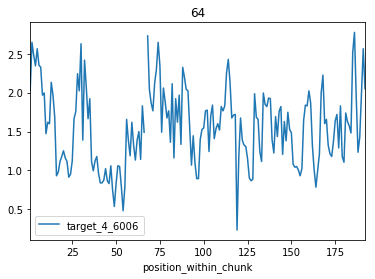

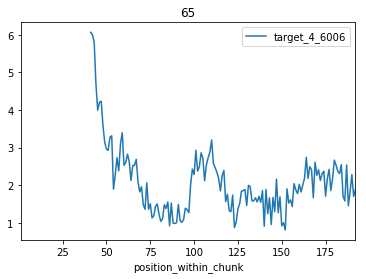

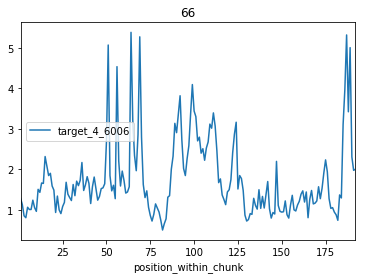

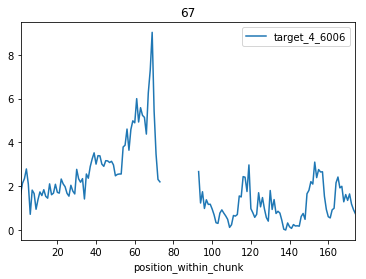

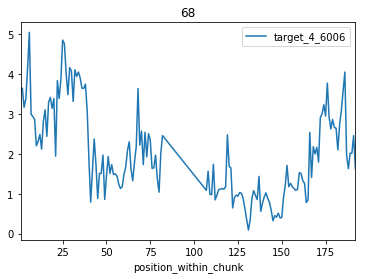

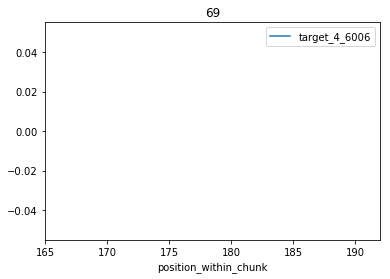

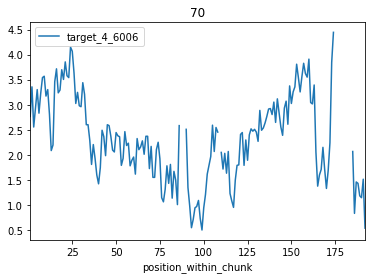

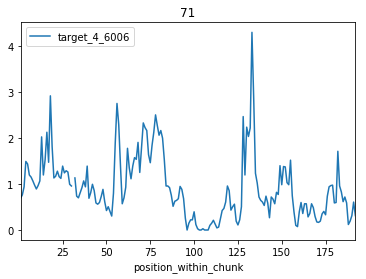

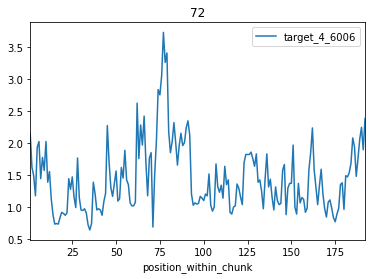

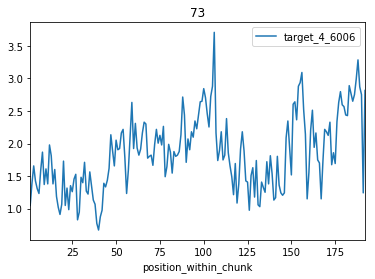

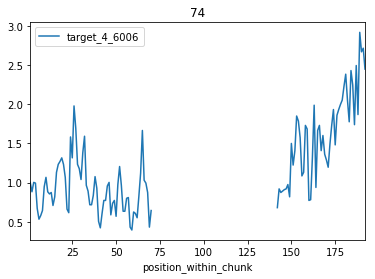

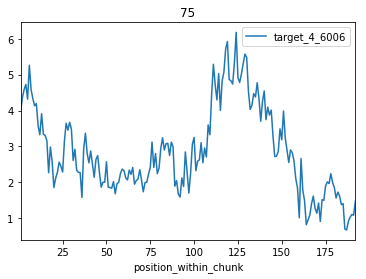

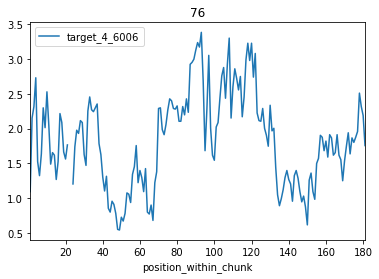

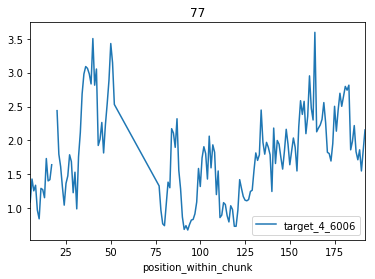

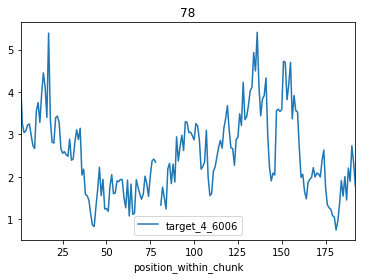

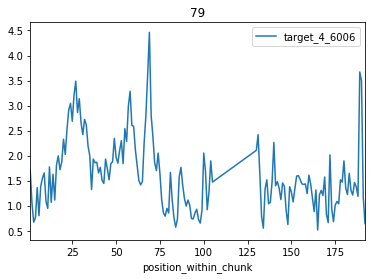

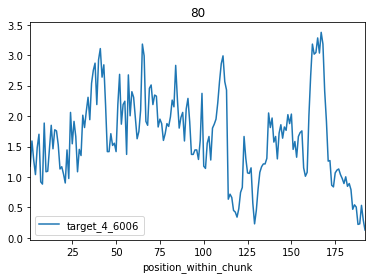

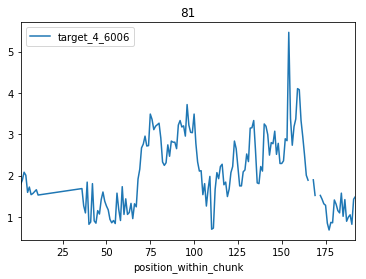

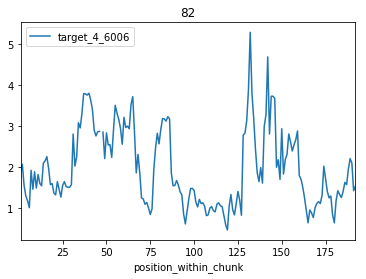

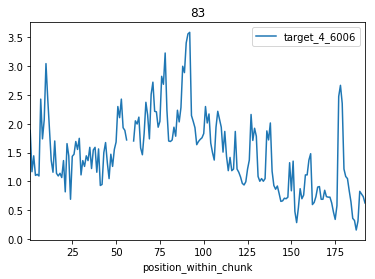

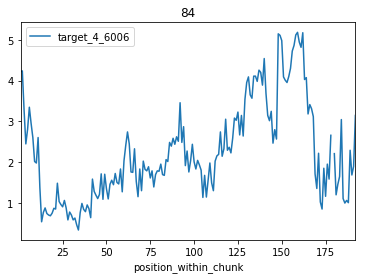

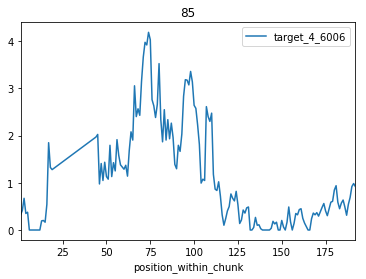

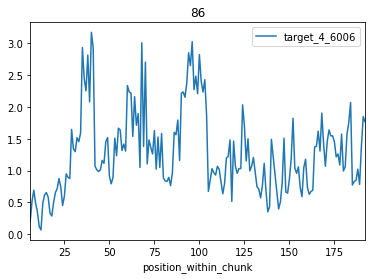

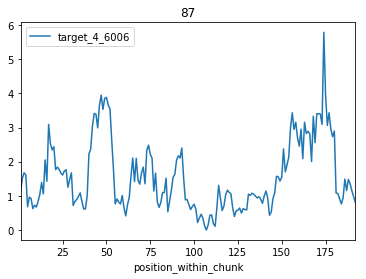

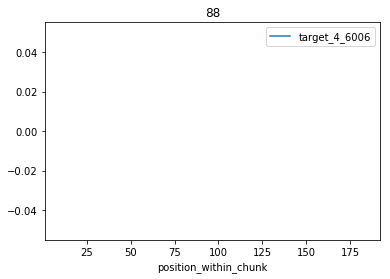

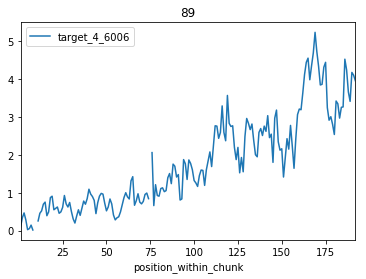

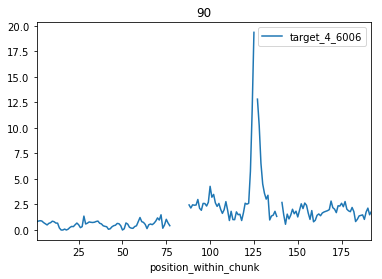

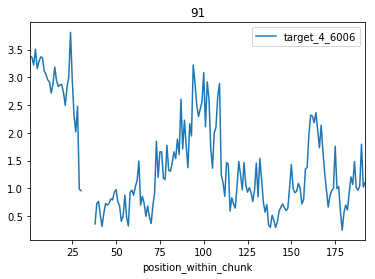

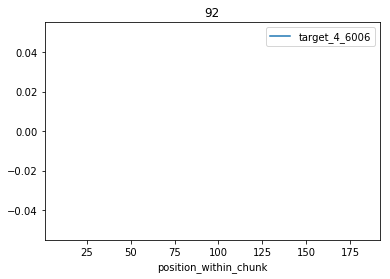

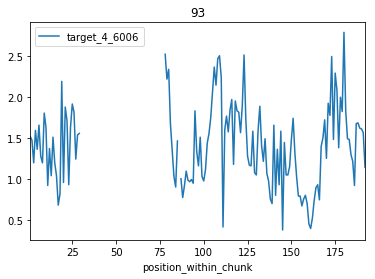

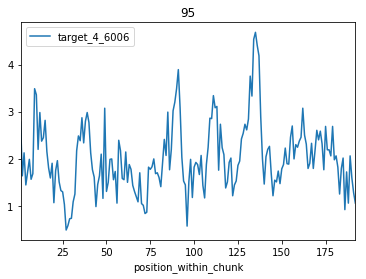

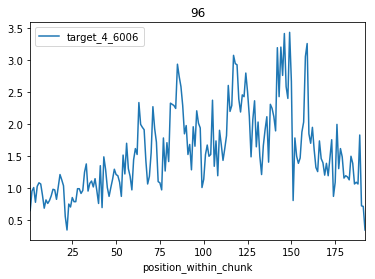

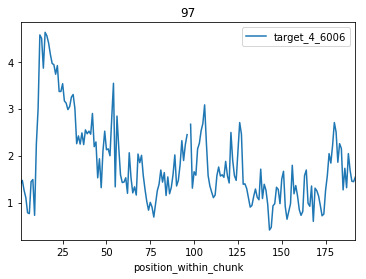

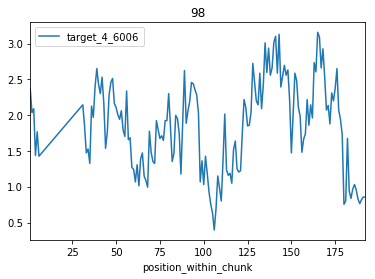

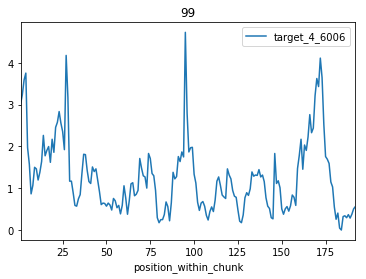

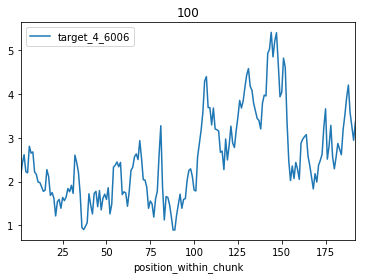

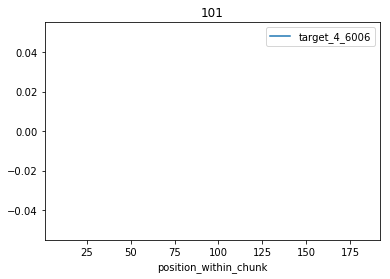

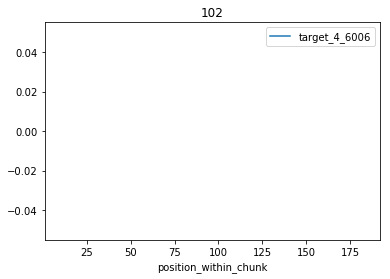

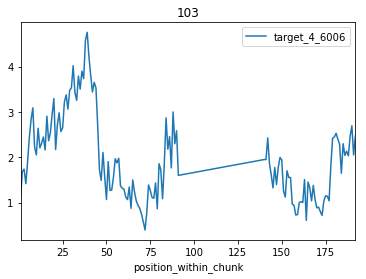

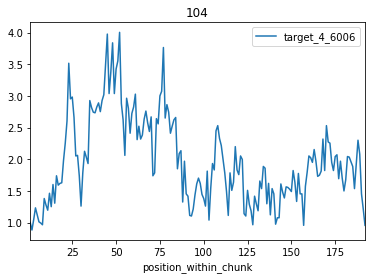

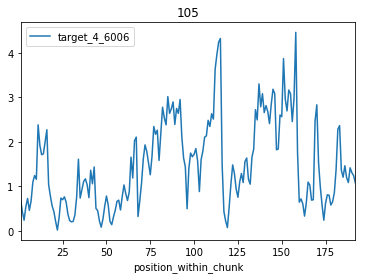

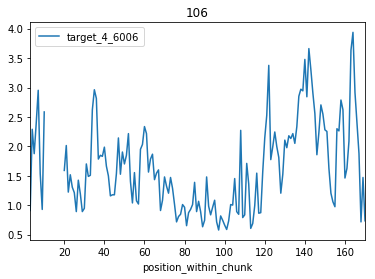

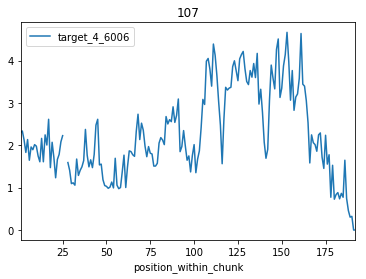

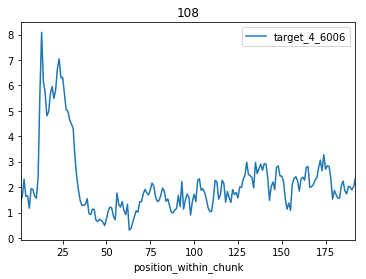

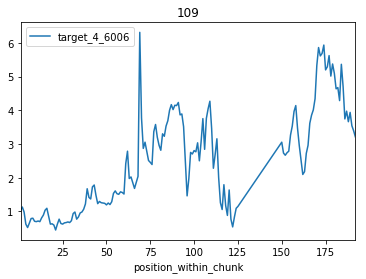

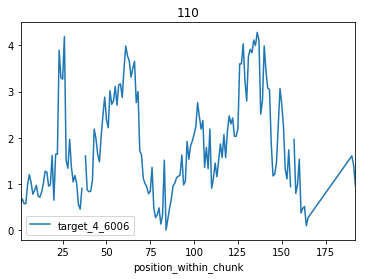

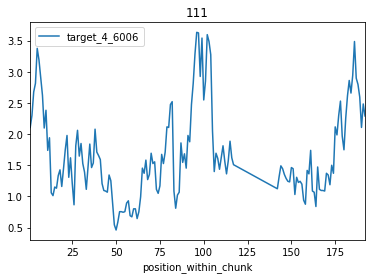

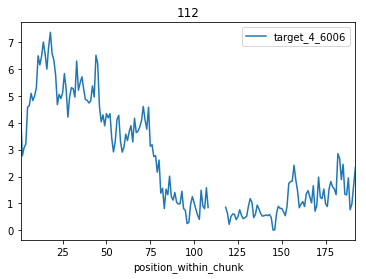

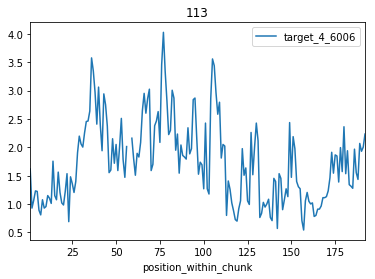

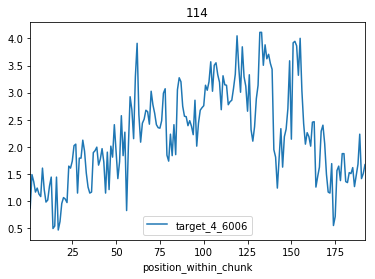

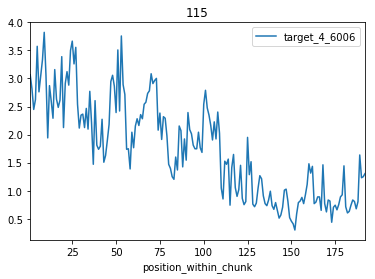

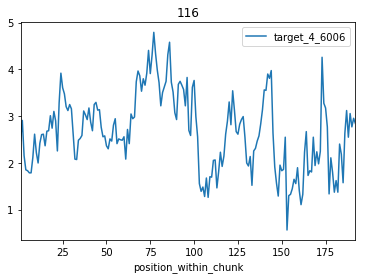

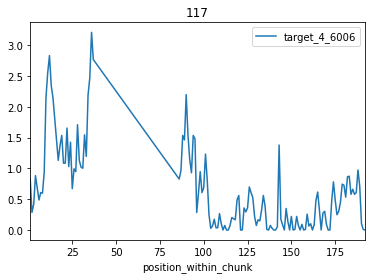

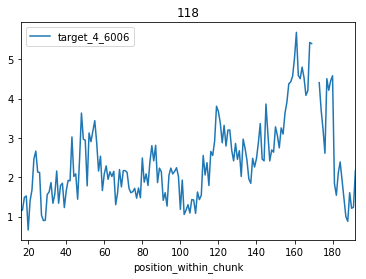

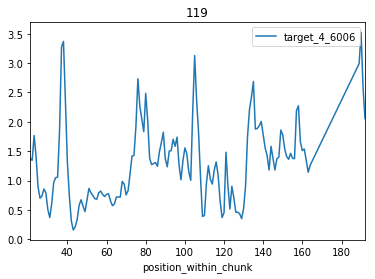

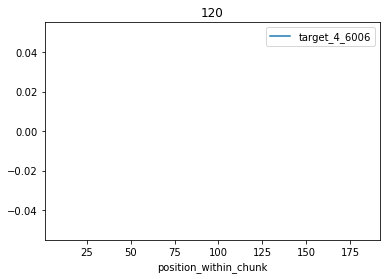

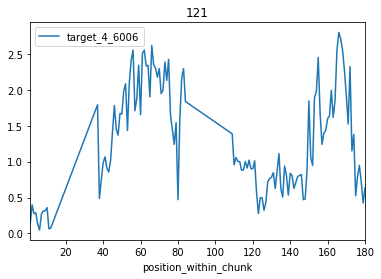

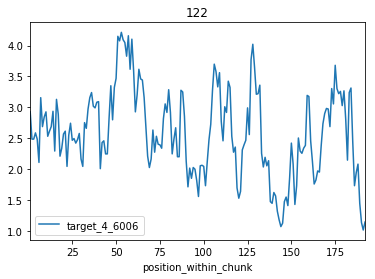

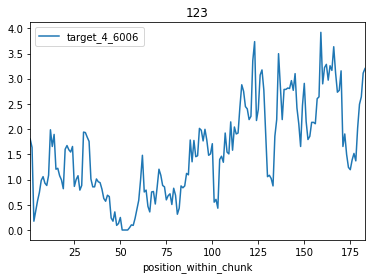

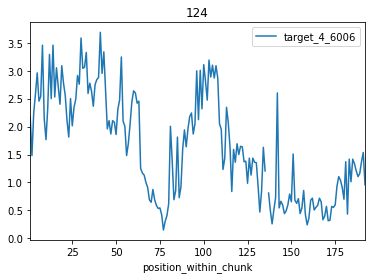

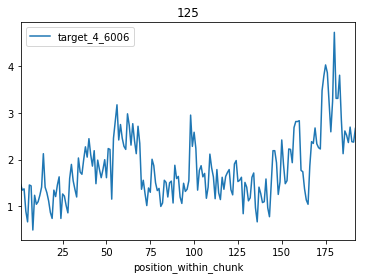

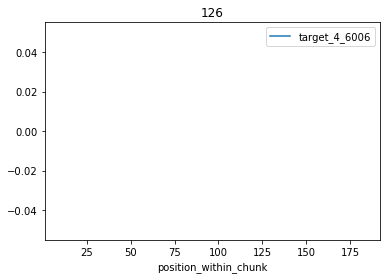

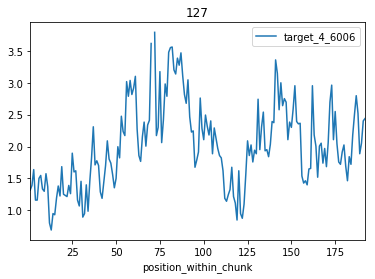

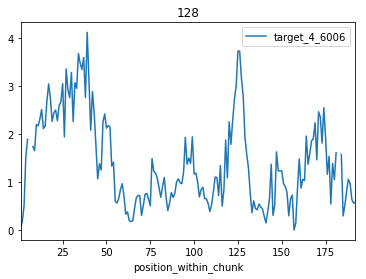

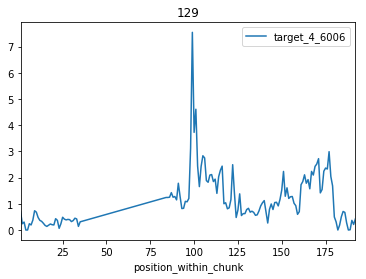

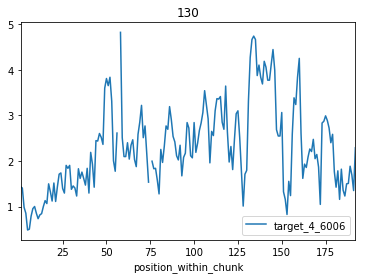

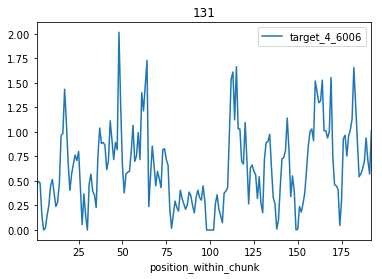

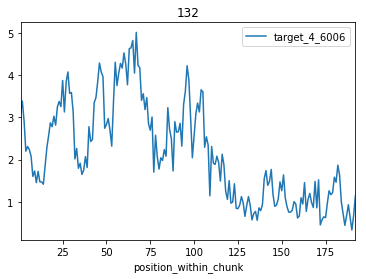

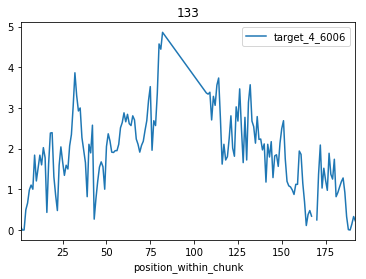

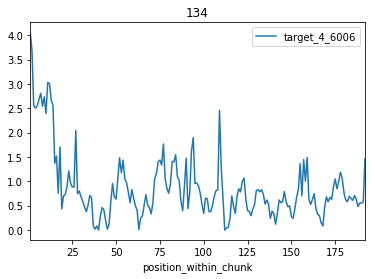

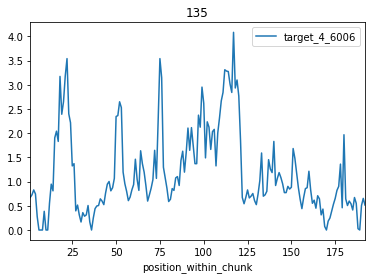

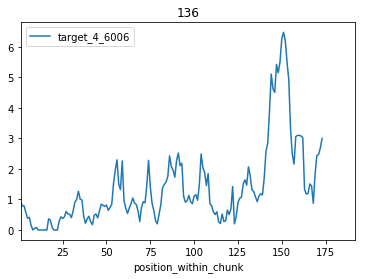

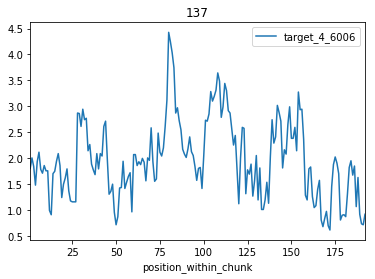

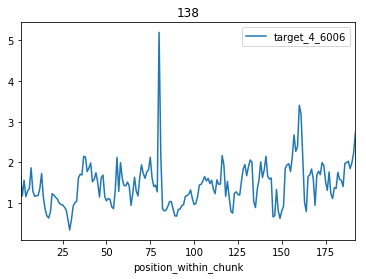

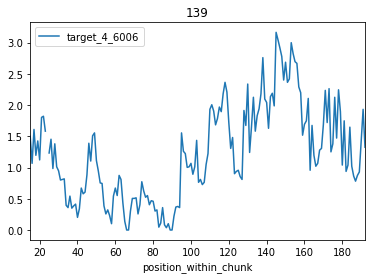

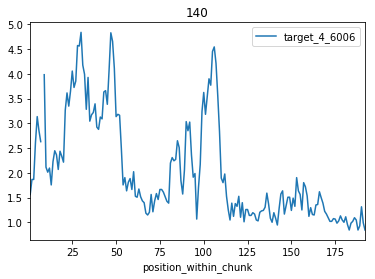

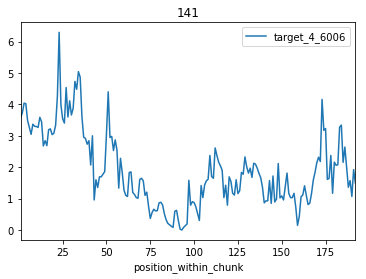

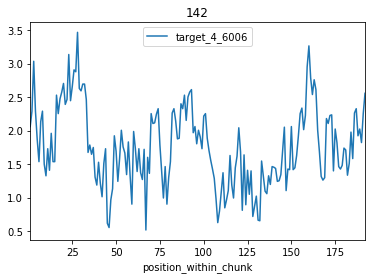

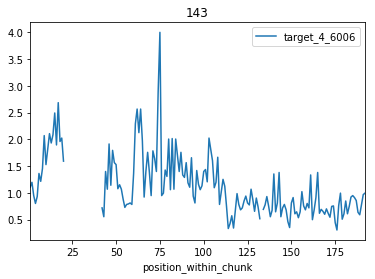

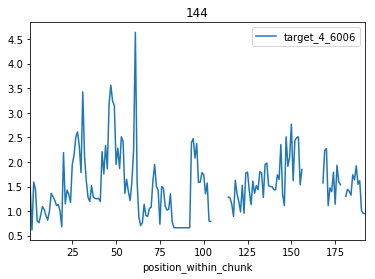

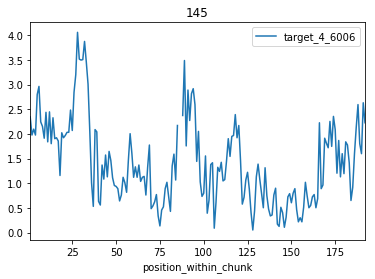

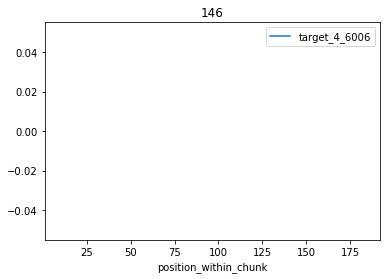

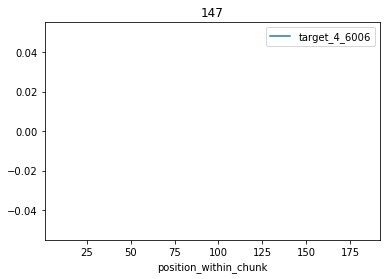

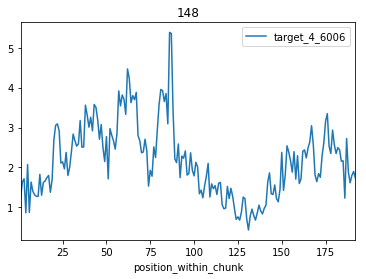

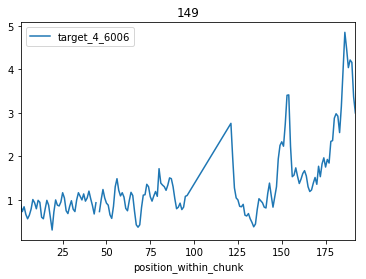

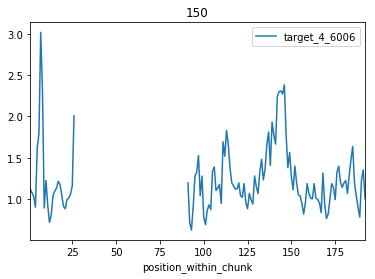

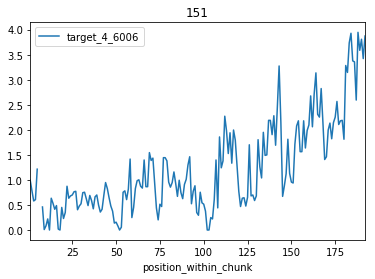

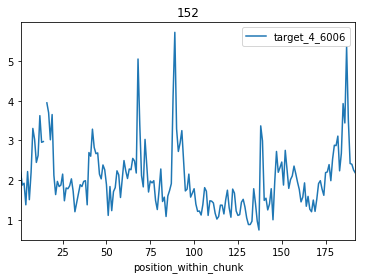

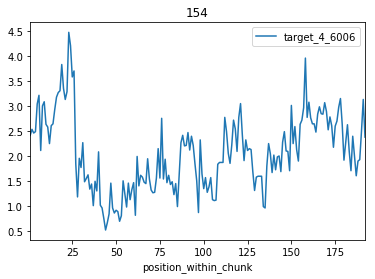

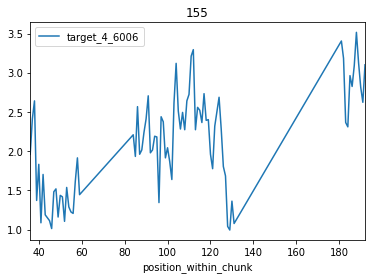

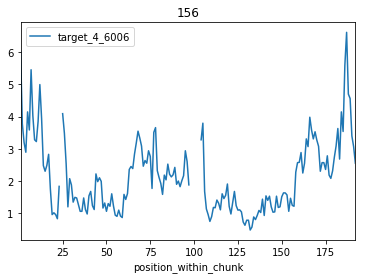

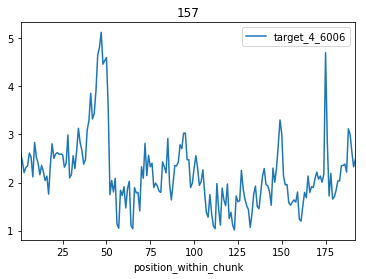

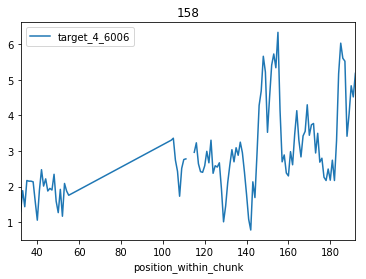

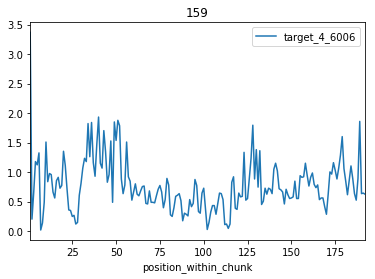

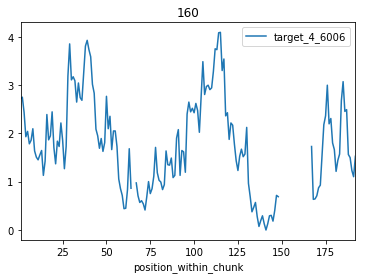

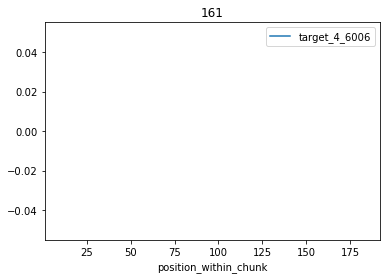

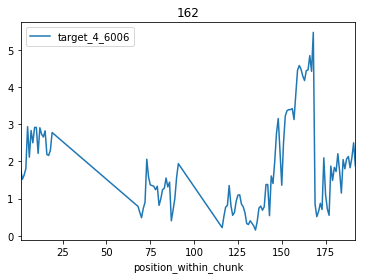

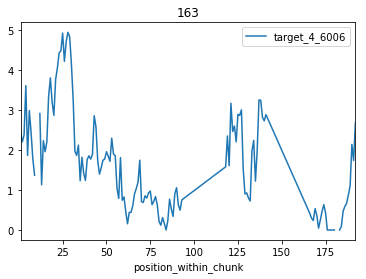

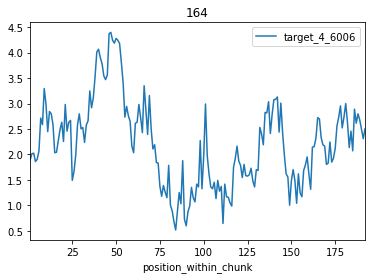

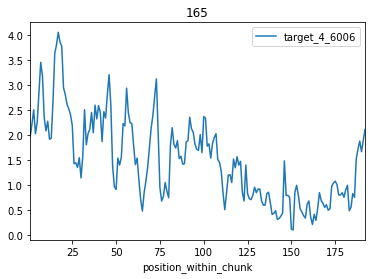

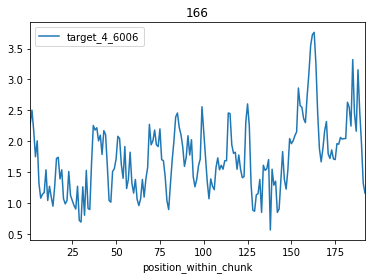

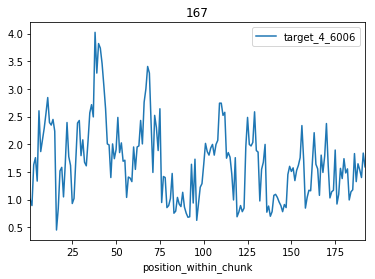

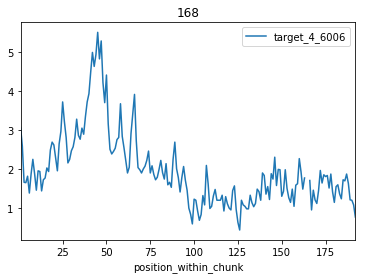

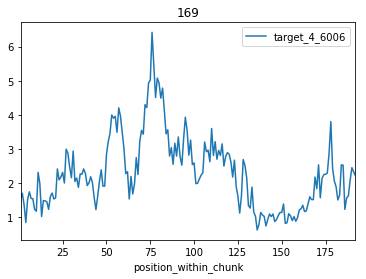

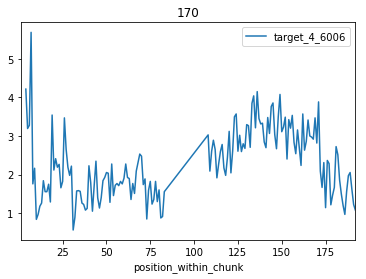

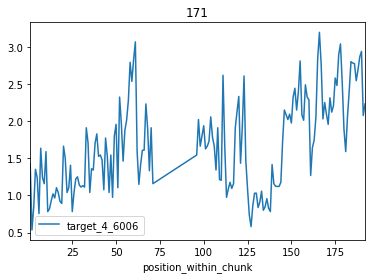

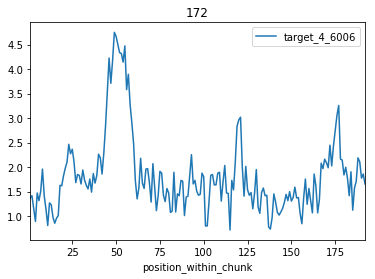

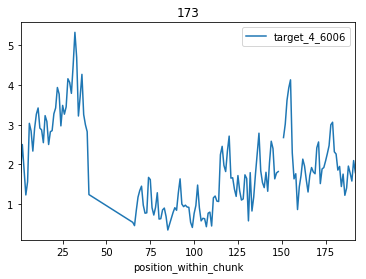

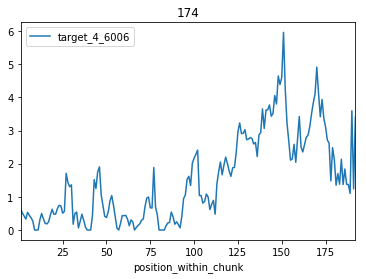

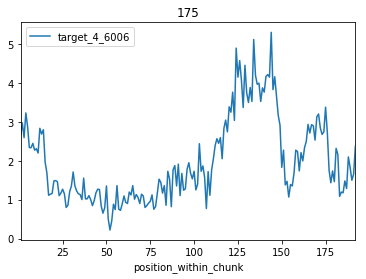

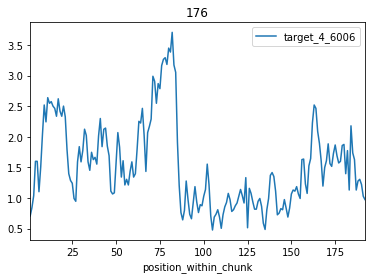

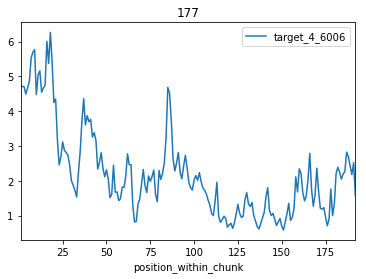

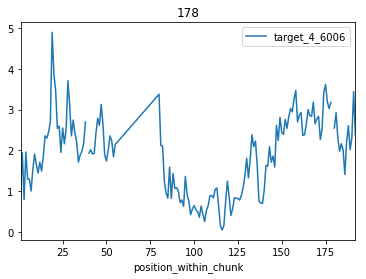

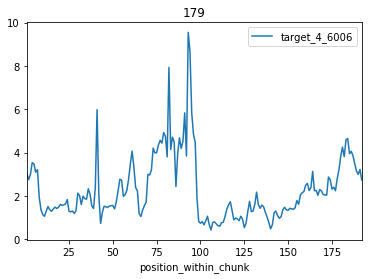

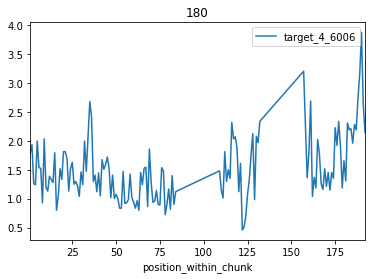

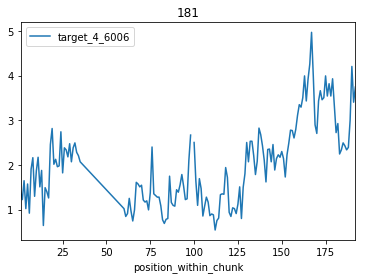

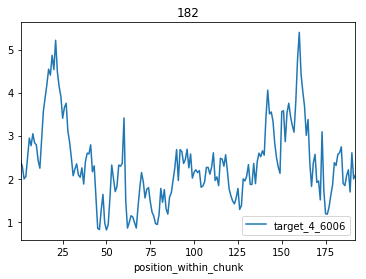

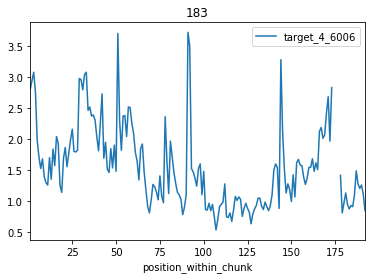

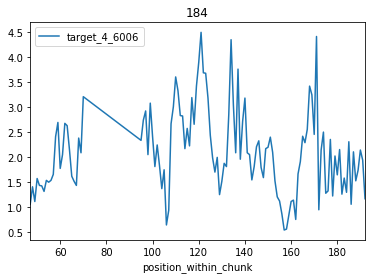

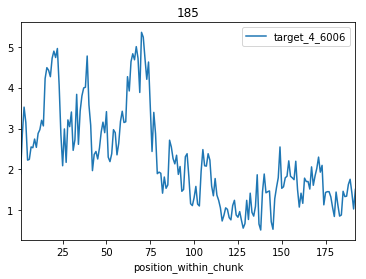

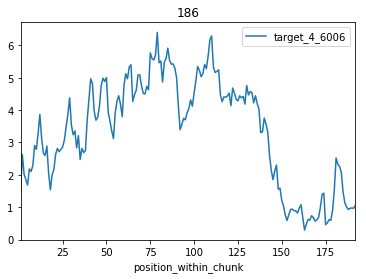

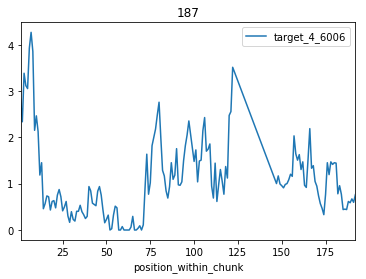

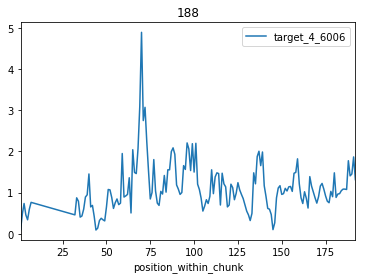

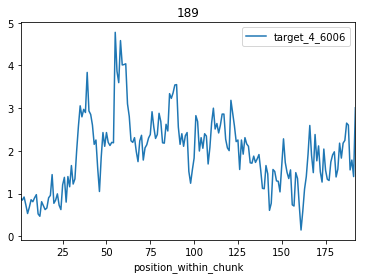

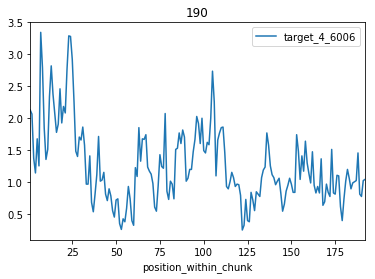

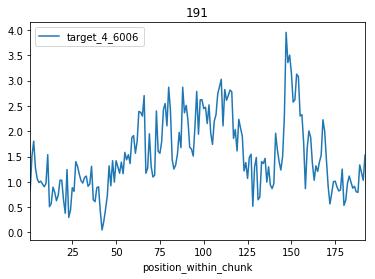

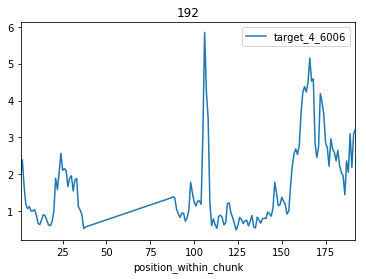

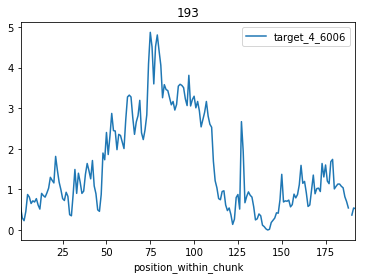

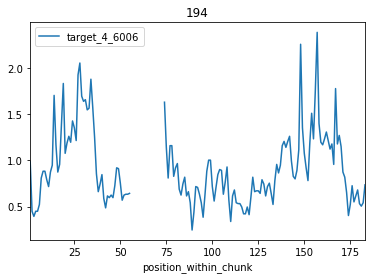

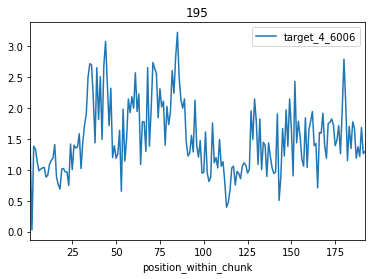

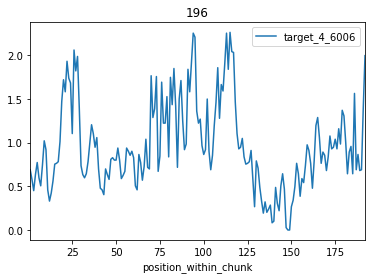

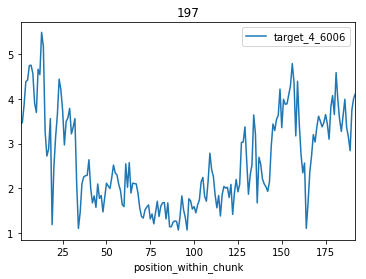

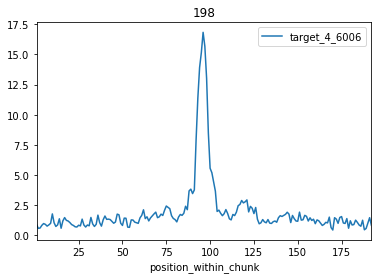

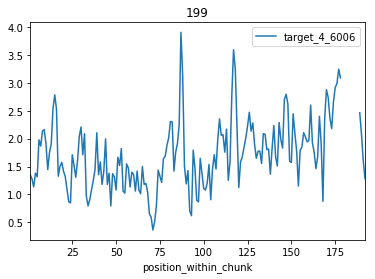

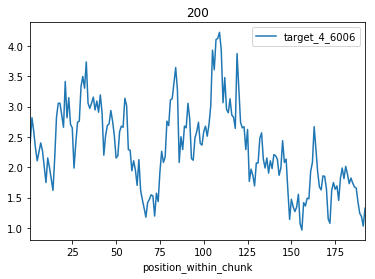

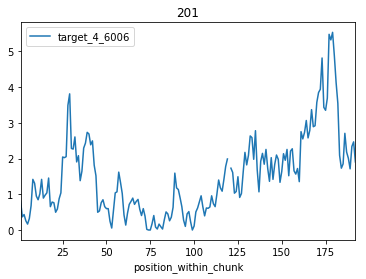

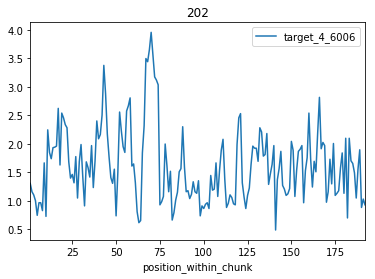

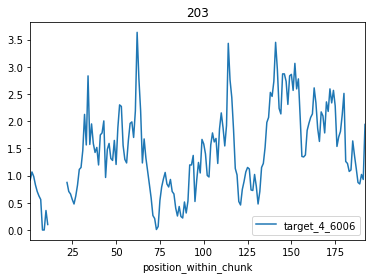

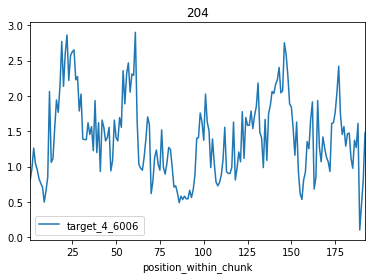

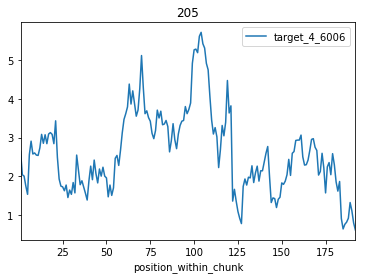

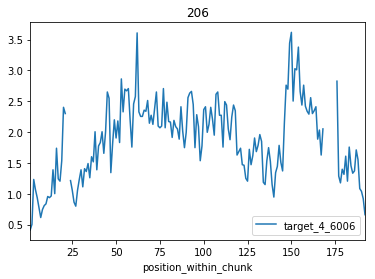

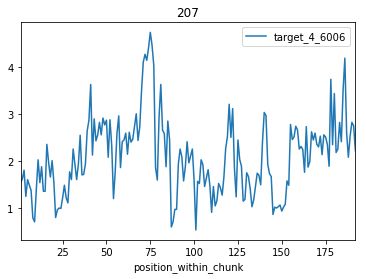

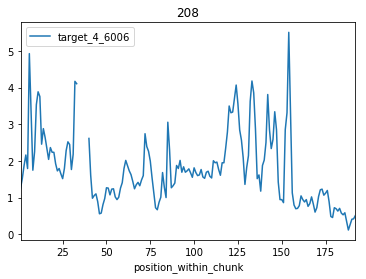

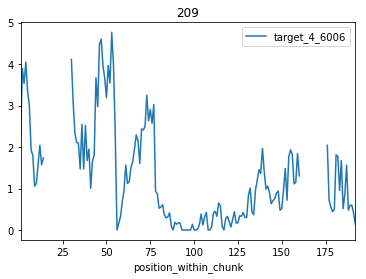

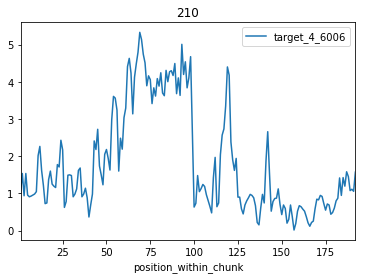

In [34]:
for i, group in df.groupby('chunkID'):
    group.plot(x='position_within_chunk', y='target_4_6006', title=str(i))

In [ ]:
# each chunk starts at different time, can't see time of day or day of week effects

In [ ]:
# to see time of day or day of week effects, need to graph them on same time scale. have to put the data on a 
#normalized time scale.

In [28]:
type('chunkID')

str

In [162]:
from pandas import DataFrame, read_csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Location = r'TrainingData.csv'
df = pd.read_csv(Location)
df.head()

dow = {'Sunday': 0,
             'Monday': 1,
             'Tuesday': 2,
             'Wednesday': 3,
             'Thursday': 4,
             'Friday': 5,
             'Saturday': 6}
df['dayofweek'] = df['weekday'].map(dow) # convert dayofweek to number
df['chunk_in_hour'] = df.dayofweek * 24 + df.hour  #create new column for hour within "normalized" time span, except from the second sunday onward.
df.head()

rowID  chunkID  position_within_chunk  month_most_common   weekday  hour  \
0      1        1                      1                 10  Saturday    21   
1      2        1                      2                 10  Saturday    22   
2      3        1                      3                 10  Saturday    23   
3      4        1                      4                 10    Sunday     0   
4      5        1                      5                 10    Sunday     1   

   Solar.radiation_64  WindDirection..Resultant_1  \
0                0.01                       117.0   
1                0.01                       231.0   
2                0.01                       247.0   
3                0.01                       219.0   
4                0.01                         2.0   

   WindDirection..Resultant_1018  WindSpeed..Resultant_1      ...        \
0                          187.0                     0.3      ...         
1                          202.0                     0.5      ...         
2                          227.0                     0.5      ...         
3                          218.0                     0.2      ...         
4                          216.0                     0.2      ...         

   target_5_6006  target_7_57  target_8_57  target_8_4002  target_8_6004  \
0            NaN     5.130631     1.341606       2.138792       3.013752   
1            NaN     5.130631     1.195779       2.722099       3.888712   
2            NaN     5.136395     1.409658       3.110970       3.888712   
3            NaN     5.217102     1.477711       2.041574       3.208188   
4            NaN     5.217102     1.458267       2.138792       3.499841   

   target_8_8003  target_9_4002  target_9_8003  dayofweek  chunk_in_hour  
0            NaN       5.679280            NaN          6            165  
1            NaN       7.426751            NaN          6            166  
2            NaN       7.683732            NaN          6            167  
3            NaN       4.831243            NaN          0              0  
4            NaN       4.625658            NaN          0              1  

[5 rows x 97 columns]

In [ ]:
## to put on normalized time course, need to pull the row on sunday midnight (0 in chunk_in_hour) for the formula

In [166]:
##df = df.groupby(['chunkID'])
df['x'] = df.loc[df['chunk_in_hour'] == 0, 'position_within_chunk'].iloc[0] ##pulled the first 0 for the whole df
df.head()

rowID  chunkID  position_within_chunk  month_most_common   weekday  hour  \
0      1        1                      1                 10  Saturday    21   
1      2        1                      2                 10  Saturday    22   
2      3        1                      3                 10  Saturday    23   
3      4        1                      4                 10    Sunday     0   
4      5        1                      5                 10    Sunday     1   

   Solar.radiation_64  WindDirection..Resultant_1  \
0                0.01                       117.0   
1                0.01                       231.0   
2                0.01                       247.0   
3                0.01                       219.0   
4                0.01                         2.0   

   WindDirection..Resultant_1018  WindSpeed..Resultant_1 ...  target_7_57  \
0                          187.0                     0.3 ...     5.130631   
1                          202.0                     0.5 ...     5.130631   
2                          227.0                     0.5 ...     5.136395   
3                          218.0                     0.2 ...     5.217102   
4                          216.0                     0.2 ...     5.217102   

   target_8_57  target_8_4002  target_8_6004  target_8_8003  target_9_4002  \
0     1.341606       2.138792       3.013752            NaN       5.679280   
1     1.195779       2.722099       3.888712            NaN       7.426751   
2     1.409658       3.110970       3.888712            NaN       7.683732   
3     1.477711       2.041574       3.208188            NaN       4.831243   
4     1.458267       2.138792       3.499841            NaN       4.625658   

   target_9_8003  dayofweek  chunk_in_hour  x  
0            NaN          6            165  4  
1            NaN          6            166  4  
2            NaN          6            167  4  
3            NaN          0              0  4  
4            NaN          0              1  4  

[5 rows x 98 columns]

In [165]:
chunked = df.groupby(['chunkID'])

chunked['x'] = df.loc[df['chunk_in_hour'] == 0, 'position_within_chunk'].iloc[0] ##won't work after groupby
##df['x'] = chunked['x'].fillna(method = 'ffill')
##df['y'] = (df['position_within_chunk']+((168-df['x'])) // 168
##df['normlized_time'] =  y*168 + 'chunk_in_hour'
chunked.head(5)



TypeError: 'DataFrameGroupBy' object does not support item assignment

In [137]:
chunked = df.groupby('chunkID')
for chunkID in chunked:
    
    chunked['x'] = df.loc[df['chunk_in_hour'] == 0, 'position_within_chunk'].iloc[0]
##df['x'] = chunked['x'].fillna(method = 'ffill')
##df['y'] = (df['position_within_chunk']+((168-df['x'])) // 168
##df['normlized_time'] =  y*168 + 'chunk_in_hour'
chunked.get_group(2)


TypeError: 'DataFrameGroupBy' object does not support item assignment